In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_wine
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [3]:
wine = load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
#随机森林建模流程
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain,Ytrain)
score_r = rfc.score(Xtest,Ytest)
print("随机森林:{}".format(score_r))

随机森林:0.9814814814814815


In [5]:
#画出随机森林和决策树在一组交叉验证下的效果对比
rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

In [6]:
clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

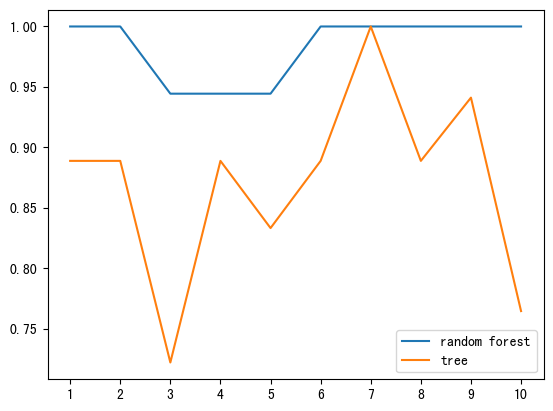

In [7]:
plt.plot(range(1,11),rfc_s,label="random forest")
plt.plot(range(1,11),clf_s,label="tree")
plt.xticks(range(1,11))
plt.legend()

In [8]:
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain,Ytrain)

In [9]:
rfc.estimators_

[DecisionTreeClassifier(max_features='sqrt', random_state=50378939),
 DecisionTreeClassifier(max_features='sqrt', random_state=72826515),
 DecisionTreeClassifier(max_features='sqrt', random_state=1656165242),
 DecisionTreeClassifier(max_features='sqrt', random_state=1480875830),
 DecisionTreeClassifier(max_features='sqrt', random_state=616759746),
 DecisionTreeClassifier(max_features='sqrt', random_state=1226323144),
 DecisionTreeClassifier(max_features='sqrt', random_state=1955917491),
 DecisionTreeClassifier(max_features='sqrt', random_state=321857384),
 DecisionTreeClassifier(max_features='sqrt', random_state=1331945615),
 DecisionTreeClassifier(max_features='sqrt', random_state=468442230),
 DecisionTreeClassifier(max_features='sqrt', random_state=1267469239),
 DecisionTreeClassifier(max_features='sqrt', random_state=327005636),
 DecisionTreeClassifier(max_features='sqrt', random_state=1233262334),
 DecisionTreeClassifier(max_features='sqrt', random_state=599179322),
 DecisionTreeCl

In [10]:
rfc.feature_importances_

array([0.13887687, 0.02052807, 0.00631851, 0.04648023, 0.0420528 ,
       0.08230598, 0.11741432, 0.01280306, 0.0232992 , 0.17744706,
       0.05330437, 0.13297969, 0.14618984])

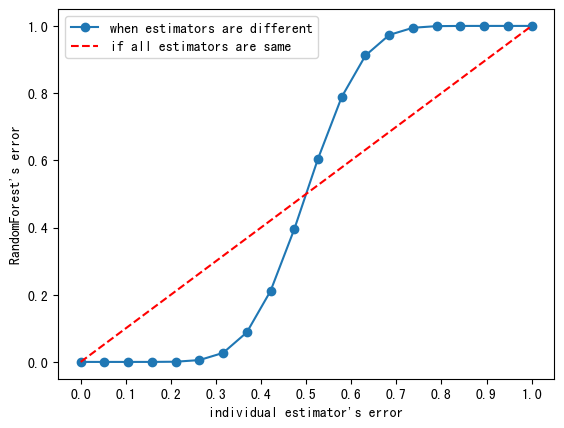

In [11]:
from scipy.special import comb
import numpy as np
x = np.linspace(0,1,20)
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) for i in range(13,26)]).sum()
    y.append(E)
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.xticks(np.linspace(0,10,11,dtype=int)*0.1)
plt.show()

In [12]:
np.linspace(0,10,11,dtype=int)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [41]:
#用随机森林回归填补缺失值
#在sklearn中，我们可以使用sklearn.impute.SimpleImputer来轻松地将均 值，中值，或者其他最常用的数值填补到数据中，
# 在这个案例中，我们将使用均值，0，和随机森林回归来填补缺 失值，并验证四种状况下的拟合状况，
# 找出对使用的数据集来说最佳的缺失值填补方法。

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.datasets import load_boston

In [43]:
dataset = load_boston()
dataset.data.shape

/Users/thinkcore/opt/anaconda3/envs/LearnPython/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include

(506, 13)

In [44]:
x_full,y_full = dataset.data,dataset.target

In [45]:
n_sample = x_full.shape[0]
n_feature = x_full.shape[1]

In [46]:
#为完整数据集放入缺失值
#首先确定我们希望放入的缺失数据的比例，在这里我们假设是50%，那总共就要有3289个数据缺失
rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_sample = int(np.floor(n_feature*n_sample*missing_rate))

In [47]:
#所有数据要随机遍布在数据集的各行各列当中，而一个缺失的数据会需要一个行索引和一个列索引
#如果能够创造一个数组，包含3289个分布在0~506中间的行索引，和3289个分布在0~13之间的列索引，那我们就可 以利用索引来为数据中的任意3289个位置赋空值
#然后我们用0，均值和随机森林来填写这些缺失值，然后查看回归的结果如何
missing_sample = np.random.randint(0,n_sample,n_missing_sample)
missing_feature = np.random.randint(0,n_feature,n_missing_sample)

In [48]:
x_missing = x_full.copy()
y_missing = y_full.copy()

In [49]:
x_missing[missing_sample,missing_feature] = np.nan

In [50]:
x_missing = pd.DataFrame(x_missing)

In [51]:
#使用0和均值填补缺失值
imp_mean = SimpleImputer(missing_values=np.nan,strategy="mean")
x_missing_mean = imp_mean.fit_transform(x_missing)

In [52]:
imp_zero = SimpleImputer(missing_values=np.nan,strategy="constant",fill_value=0)
x_missing_zero = imp_zero.fit_transform(x_missing)

In [53]:
#用随机森林填补缺失值
x_missing_reg = x_missing.copy()

In [23]:
sortindex = np.argsort(x_missing_reg.isnull().sum()).values

In [68]:
for i in sortindex:
    #构建新的特征矩阵和新标签
    df = x_missing_reg
    fillc = df.iloc[:,i]
    df = pd.concat([df.iloc[:,df.columns!=i],pd.DataFrame(y_full)],axis=1)

    ##在新特征矩阵中，对含有缺失值的列，进行0的填补
    df_0 = SimpleImputer(missing_values=np.nan,strategy="constant",fill_value=0).fit_transform(df)

    #找出我们的训练集和测试集
    Ytrain = fillc[fillc.notnull()]
    Ytest = fillc[fillc.isnull()]
    Xtrain = df_0[Ytrain.index,:]
    Xtest = df_0[Ytest.index,:]
    #用随机森林回归来填补缺失值
    rfr = RandomForestRegressor(random_state=0)
    rfr = rfr.fit(Xtrain,Ytrain)
    Y_predict = rfr.predict(Xtest)
    #将填补好的特征返回到我们的原始的特征矩阵中
    x_missing_reg.iloc[Ytest.index,i] = Y_predict

In [70]:
#对所有数据进行建模，取得MSE结果
X = [x_full,x_missing_mean,x_missing_zero,x_missing_reg]
mse = []
std = []

In [71]:
for x in X:
    est = RandomForestRegressor(random_state=0)
    scores = cross_val_score(est,x,y_full,cv=10,scoring="neg_mean_squared_error").mean()
    mse.append(scores*-1)

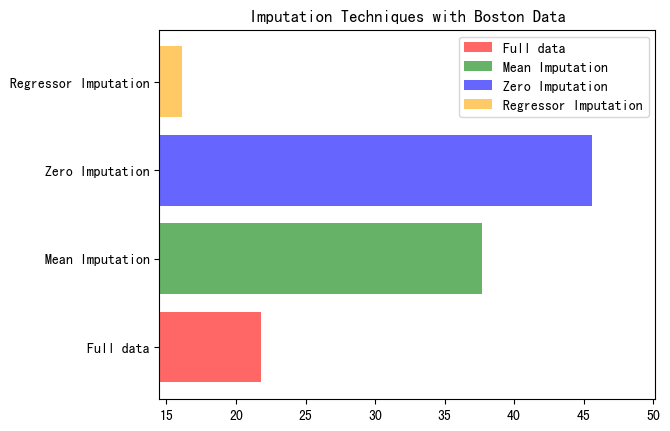

In [83]:
#用所得结果画出图
x_labels = ['Full data', 'Mean Imputation','Zero Imputation', 'Regressor Imputation']
colors = ['r', 'g', 'b', 'orange']

for i in np.arange(len(mse)):
    plt.barh(i, mse[i],color=colors[i], alpha=0.6, align='center',label=x_labels[i])
plt.title('Imputation Techniques with Boston Data')
plt.xlim(left=np.min(mse) * 0.9, right=np.max(mse) * 1.1)
plt.yticks([0,1,2,3],x_labels)
plt.legend()
plt.show()

In [74]:
mse

[21.765896304705873, 37.70587640996079, 45.611605307568624, 16.106117026705878]

In [84]:
x_full.shape

(506, 13)

In [85]:
t = pd.DataFrame(x_full)

In [88]:
tp = t.iloc[:,0]

In [89]:
type(tp)

pandas.core.series.Series

In [91]:
tp.shape
type(df_0)

numpy.ndarray

In [94]:
type(df.columns!=i)
df.columns!=i

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

# 随机森林在乳腺癌数据上的调参

In [95]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [96]:
data = load_breast_cancer()

In [98]:
data.data.shape

(569, 30)

## 进行一次简单的建模，看看模型本身在数据集上的效果

In [100]:
rfc = RandomForestClassifier(n_estimators=100,random_state=0)
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score_pre

0.9649122807017545

## 随机森林调整的第一步：无论如何先来调n_estimators

0.9649122807017545 11


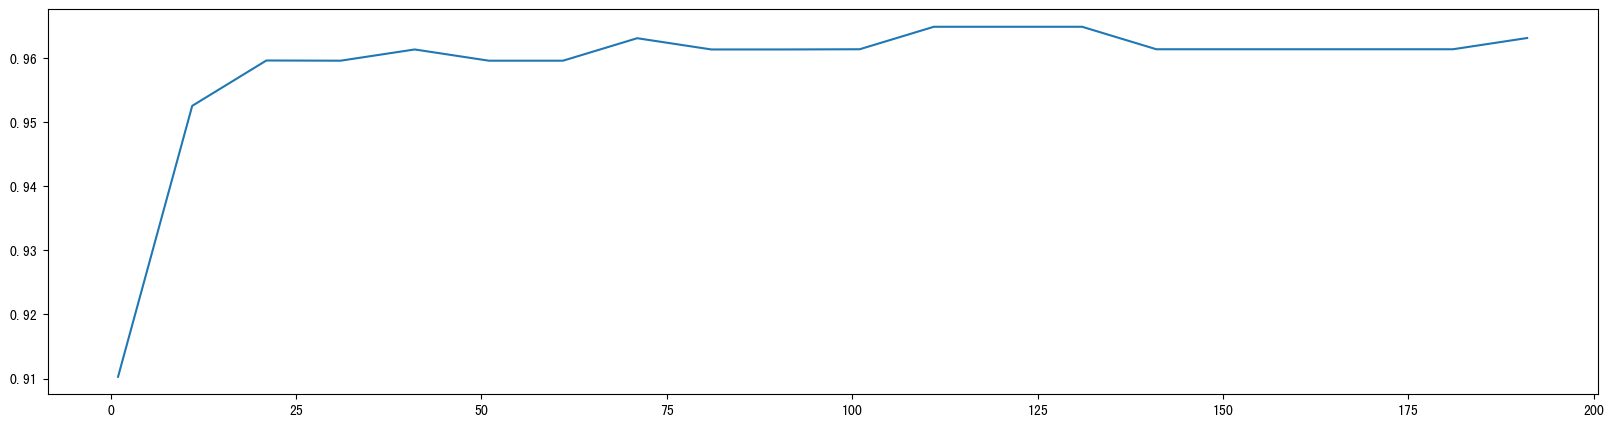

In [104]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,random_state=0,n_jobs=-1)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)

print(max(scorel),scorel.index(max(scorel)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()

## 为网格搜索做准备，书写网格搜索的参数

### 开始按照参数对模型整体准确率的影响程度进行调参，首先调整max_depth

In [105]:
param_grid = {'max_depth':np.arange(1,20,1)}
rfc = RandomForestClassifier(n_estimators=111,random_state=0)
gs = GridSearchCV(rfc,param_grid,cv=10)
gs.fit(data.data,data.target)

gs.best_score_

0.9649122807017545

In [106]:
gs.best_params_

{'max_depth': 8}

### 调整max_features，max_features是唯一一个即能够将模型往左（低方差高偏差）推，也能够将模型往右（高方差低偏差）推的参数。我们需要根据调参前，模型所在的位置（在泛化误差最低点的左边还是右边）来决定我们要将max_features往哪边调。

In [107]:
rfc = RandomForestClassifier(n_estimators=111,random_state=0,max_depth=8)
param_grid = {'max_features':np.arange(5,30,1)}
gs = GridSearchCV(rfc,param_grid,cv=10)
gs.fit(data.data,data.target)
gs.best_score_

0.968421052631579

In [108]:
gs.best_params_

{'max_features': 10}

In [112]:
rfc = RandomForestClassifier(max_depth=8,max_features=10,n_estimators=111,random_state=0)
score = cross_val_score(rfc,data.data,data.target,cv=10).mean()

In [113]:
score

0.968421052631579